Install relevant packages

In [1]:
#!pip install numpy pandas
#!pip install matplotlib
#!pip install scikit-learn
#!pip install tensorflow
#!pip install plotly
#! pip install -Uq nbformat
#!pip install librosa
# !pip install tsfresh
# !pip install ta

Load dependencies

In [2]:
from dependencies import *
from functionsAK import *
#from functions import *

Save data as .pkl format and load

In [3]:
# data_acc = pd.read_csv(r"C:\Users\arvin.karpiah\Desktop\Data\Snowflake-2-2022\from Vista Flow\Accelerometer data\Acc_Shot_1101_10000.txt",delim_whitespace=True)
# data_acc.to_pickle('data_acc_1101_10000.pkl')
# acc_data = pd.read_pickle('data_acc_1101_4000.pkl')

Organize data

In [4]:
# X , Y = data_sorter1(acc_data,10,400)
# X = pd.DataFrame(X.T, columns=Y)
# X.to_pickle('X.pkl')

In [5]:
X = pd.read_pickle('X.pkl')
X = pd.DataFrame(X)
Y = X.columns
Y = pd.Series(Y)

In [6]:
X_norm = np.zeros_like(X)

# Normalize by max value by column and round to 3sf
for i in range(X.shape[1]):
    X_norm[:, i] = normalize_maxval(X.values[:, i])
    X_norm[:, i] = np.round(X_norm[:, i], 3)

X_norm = pd.DataFrame(X_norm, columns=X.columns, index=X.index)

In [7]:
X_norm

,455.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,...,779.2,779.2,779.2,779.2,779.2,779.2,779.2,779.2,779.2,779.2
0,-0.001,0.001,0.002,-0.001,-0.000,-0.001,0.000,-0.001,0.002,-0.001,...,0.084,0.070,0.006,0.033,-0.006,-0.102,0.040,0.068,-0.015,0.124
1,-0.002,0.000,0.001,-0.001,0.000,0.000,0.001,0.000,0.000,-0.001,...,0.060,0.066,0.008,0.028,-0.007,0.017,0.023,0.085,0.002,0.111
2,-0.002,0.000,0.000,-0.000,-0.001,0.001,0.001,0.002,-0.002,-0.000,...,0.013,0.064,0.007,0.023,-0.003,0.119,0.010,0.083,0.017,0.082
3,-0.001,0.000,-0.001,0.001,-0.002,0.001,0.001,0.002,-0.003,-0.000,...,-0.041,0.059,0.003,0.016,0.002,0.186,-0.001,0.064,0.025,0.023
4,-0.001,-0.000,-0.001,0.001,-0.002,0.000,0.000,0.001,-0.004,-0.001,...,-0.085,0.050,-0.001,0.011,0.006,0.201,-0.012,0.027,0.023,-0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.024,-0.051,0.015,0.036,-0.008,0.003,0.002,-0.000,0.025,0.032,...,0.459,0.200,-0.193,0.016,-0.017,-0.447,-0.231,-0.163,0.046,0.139
396,0.014,-0.039,0.009,0.031,-0.009,0.002,0.001,-0.014,0.019,0.028,...,0.341,0.210,-0.153,0.032,0.004,-0.394,-0.242,-0.091,0.044,0.219
397,0.002,-0.023,0.002,0.024,-0.010,0.002,0.000,-0.027,0.012,0.024,...,0.210,0.211,-0.110,0.042,0.022,-0.296,-0.239,-0.010,0.041,0.248
398,-0.012,-0.004,-0.004,0.016,-0.011,0.001,0.001,-0.036,0.005,0.018,...,0.087,0.209,-0.068,0.043,0.036,-0.164,-0.219,0.037,0.036,0.221


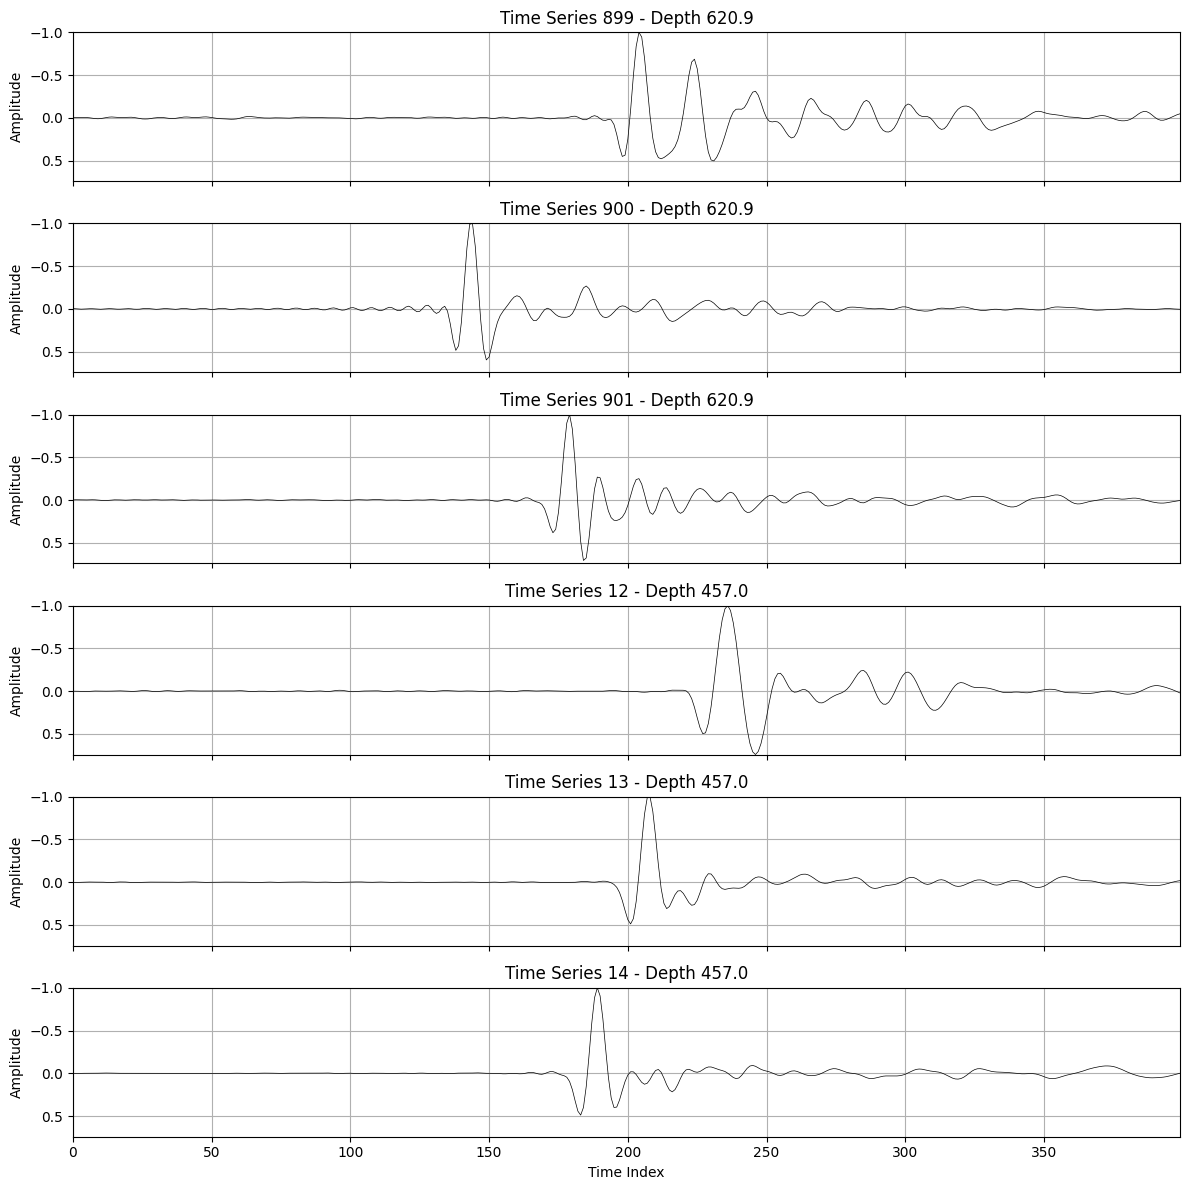

In [8]:
df = X_norm.T
depth_labels = Y

def plot_time_series(df, depth_labels, indices_to_plot):
    # Number of subplots
    num_plots = len(indices_to_plot)
    
    # Create a figure with subplots
    fig, axs = plt.subplots(num_plots, 1, figsize=(12, 2 * num_plots), sharex=True)
    
    # Ensure axs is an array even if there's only one subplot
    if num_plots == 1:
        axs = [axs]
    
    # Time index for x-axis (assuming it is 0 to 399)
    time_index = np.arange(df.shape[1])
    
    # Calculate global min and max values for y-axis limits
    global_min = float('inf')
    global_max = float('-inf')
    for idx in indices_to_plot:
        time_series = df.iloc[idx].values
        global_min = min(global_min, time_series.min())
        global_max = max(global_max, time_series.max())
    
    for i, idx in enumerate(indices_to_plot):
        # Extract the time series and its depth label
        time_series = df.iloc[idx].values
        depth_label = depth_labels[idx]
        
        # Plot the time series in the appropriate subplot
        axs[i].plot(time_index, time_series, color='black', linewidth=0.5)
        # axs[i].fill_between(time_index, 0, time_series, where=(time_series >= 0), facecolor='black', interpolate=True)
        # axs[i].fill_between(time_index, 0, time_series, where=(time_series < 0), facecolor='gray', interpolate=True)
        axs[i].set_title(f'Time Series {idx} - Depth {depth_label}')
        axs[i].set_ylabel('Amplitude')
        axs[i].set_xlim(0, df.shape[1] - 1)  # Ensure x-axis limits are correct
        axs[i].set_ylim(global_min, global_max)  # Set the same y-axis limits for all subplots
        axs[i].invert_yaxis()  # Invert y-axis to match seismic plot convention
        axs[i].grid(True)
    
    axs[-1].set_xlabel('Time Index')
    
    plt.tight_layout()
    plt.show()

# Example usage
indices_to_plot = [899,900,901,12,13,14]  # Specify the indices of the time series to plot
plot_time_series(df, depth_labels, indices_to_plot)

In [9]:
# Compute amplitude spectrum

amplitude_spectrum = np.abs(np.fft.fft(X_norm))
sampling_frequency = 1000
frequency = np.fft.fftfreq(len(X_norm), d=1/sampling_frequency)

amplitude_spectrum = pd.DataFrame(amplitude_spectrum,columns=X.columns, index=frequency)

# Normalize and round off the amplitude spectrum

amplitude_spectrum_norm = np.zeros_like(X)

# Normalize by max value by column and round to 3sf
for i in range(X.shape[1]):
    amplitude_spectrum_norm[:, i] = normalize_maxval(amplitude_spectrum.values[:, i])
    amplitude_spectrum_norm[:, i] = np.round(amplitude_spectrum_norm[:, i], 3)

amplitude_spectrum_norm = pd.DataFrame(amplitude_spectrum_norm, columns=amplitude_spectrum.columns, index=amplitude_spectrum.index)

# Select only positive frequencies

amplitude_spectrum_norm = amplitude_spectrum_norm[amplitude_spectrum_norm.index >= 0]
amplitude_spectrum_norm

,455.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,...,779.2,779.2,779.2,779.2,779.2,779.2,779.2,779.2,779.2,779.2
0.0,0.063,0.031,0.029,0.022,0.023,0.026,0.017,0.029,0.035,0.016,...,0.013,0.016,0.035,0.029,0.017,0.026,0.023,0.022,0.029,0.031
2.5,0.060,0.031,0.027,0.022,0.022,0.022,0.019,0.027,0.024,0.024,...,0.015,0.024,0.024,0.027,0.019,0.022,0.022,0.022,0.027,0.031
5.0,0.055,0.030,0.024,0.022,0.021,0.021,0.020,0.019,0.021,0.027,...,0.013,0.027,0.021,0.019,0.020,0.021,0.021,0.022,0.024,0.030
7.5,0.047,0.027,0.022,0.020,0.019,0.022,0.020,0.010,0.016,0.016,...,0.008,0.016,0.016,0.010,0.020,0.022,0.019,0.020,0.022,0.027
10.0,0.034,0.021,0.019,0.018,0.016,0.021,0.020,0.007,0.014,0.005,...,0.006,0.005,0.014,0.007,0.020,0.021,0.016,0.018,0.019,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487.5,0.180,0.263,0.537,0.656,0.305,0.343,0.611,0.393,0.883,0.121,...,0.398,0.121,0.883,0.393,0.611,0.343,0.305,0.656,0.537,0.263
490.0,0.001,0.391,0.478,0.613,0.324,0.328,0.616,0.703,0.748,0.109,...,0.514,0.109,0.748,0.703,0.616,0.328,0.324,0.613,0.478,0.391
492.5,0.141,0.563,0.456,0.526,0.293,0.457,0.508,0.892,0.467,0.147,...,0.574,0.147,0.467,0.892,0.508,0.457,0.293,0.526,0.456,0.563
495.0,0.215,0.747,0.459,0.411,0.200,0.529,0.296,0.918,0.392,0.149,...,0.535,0.149,0.392,0.918,0.296,0.529,0.200,0.411,0.459,0.747


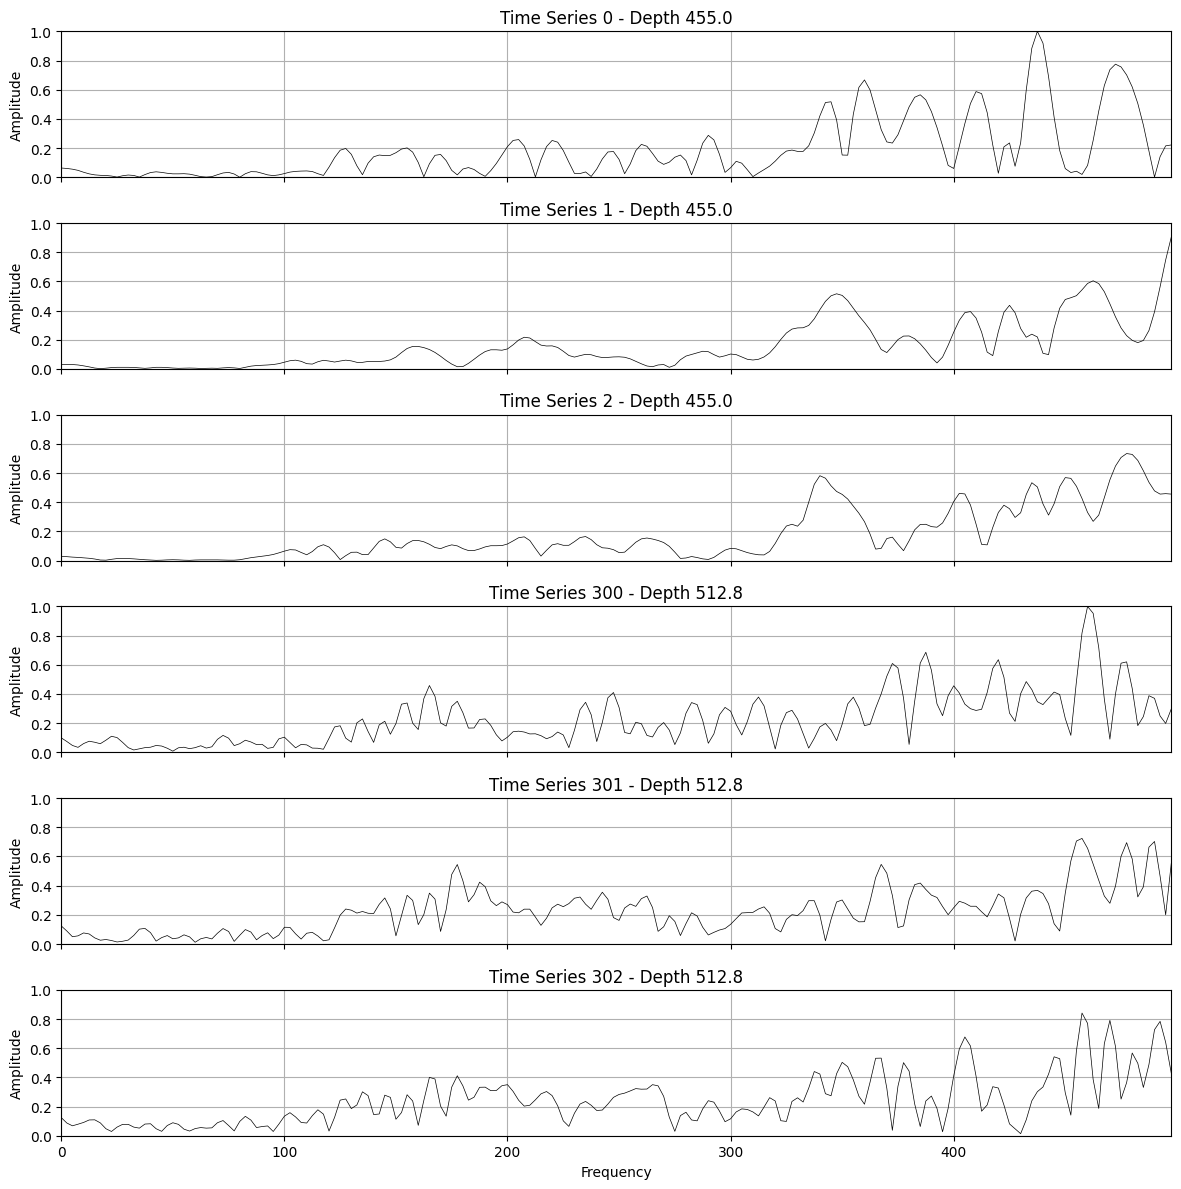

In [10]:
df = amplitude_spectrum_norm.T
depth_labels = X.columns

def plot_time_series(df, depth_labels, indices_to_plot):
    # Number of subplots
    num_plots = len(indices_to_plot)
    
    # Create a figure with subplots
    fig, axs = plt.subplots(num_plots, 1, figsize=(12, 2 * num_plots), sharex=True)
    
    # Ensure axs is an array even if there's only one subplot
    if num_plots == 1:
        axs = [axs]
    
    
    time_index = amplitude_spectrum_norm.index
    
    # Calculate global min and max values for y-axis limits
    global_min = float('inf')
    global_max = float('-inf')
    for idx in indices_to_plot:
        time_series = df.iloc[idx].values
        global_min = min(global_min, time_series.min())
        global_max = max(global_max, time_series.max())
    
    for i, idx in enumerate(indices_to_plot):
        # Extract the time series and its depth label
        time_series = df.iloc[idx].values
        depth_label = depth_labels[idx]
        
        # Plot the time series in the appropriate subplot
        axs[i].plot(time_index, time_series, color='black', linewidth=0.5)
        # axs[i].fill_between(time_index, 0, time_series, where=(time_series >= 0), facecolor='black', interpolate=True)
        # axs[i].fill_between(time_index, 0, time_series, where=(time_series < 0), facecolor='gray', interpolate=True)
        axs[i].set_title(f'Time Series {idx} - Depth {depth_label}')
        axs[i].set_ylabel('Amplitude')
        axs[i].set_xlim(0, max(amplitude_spectrum_norm.index))  # Ensure x-axis limits are correct
        axs[i].set_ylim(global_min, global_max)  # Set the same y-axis limits for all subplots
        # axs[i].invert_yaxis()  # Invert y-axis to match seismic plot convention
        axs[i].grid(True)
    
    axs[-1].set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage
indices_to_plot = [0,1,2, 300,301,302]  # Specify the indices of the time series to plot
plot_time_series(df, depth_labels, indices_to_plot)

In [11]:
# Convert to tensor
X = torch.tensor(amplitude_spectrum_norm.values)

# Quantize the time series
num_bins = 256
quantized_series = torch.round(X * (num_bins - 1)).long().T
depth_labels = torch.tensor(Y)

# Get unique values in depth_labels
unique_values = np.unique(depth_labels)

# Create a mapping from unique values to a new range starting from 0
value_to_index = {value: index for index, value in enumerate(unique_values)}

# Apply the mapping to depth_labels
mapped_depth_labels = np.vectorize(value_to_index.get)(depth_labels)

# Convert back to torch tensor
mapped_depth_labels = torch.tensor(mapped_depth_labels)

# Print the result
print("Original depth_labels:", depth_labels)
print("Mapped depth_labels:", mapped_depth_labels)
print("Quantized series shape:", quantized_series.shape)
print("Mapped depth_labels shape:", mapped_depth_labels.shape)


token_ids_src = quantized_series
token_ids_tgt = mapped_depth_labels

Original depth_labels: tensor([455.0000, 455.0000, 455.0000,  ..., 779.2000, 779.2000, 779.2000],
       dtype=torch.float64)
Mapped depth_labels: tensor([  0,   0,   0,  ..., 230, 230, 230], dtype=torch.int32)
Quantized series shape: torch.Size([2541, 200])
Mapped depth_labels shape: torch.Size([2541])


In [12]:
# time_series = amplitude_spectrum_norm.T.values

# # Get unique values and their count
# timeseries_unique = np.unique(time_series)
# timeseries_size = len(timeseries_unique)

# # Sort the unique values
# timeseries_sorted = np.sort(timeseries_unique)

# # Create a dictionary for mapping
# timeseries_dictionary = {value: idx for idx, value in enumerate(timeseries_sorted)}

# # Initialize token IDs array
# token_ids_src = np.zeros_like(time_series, dtype=int)

# # Map the time series values to token IDs
# for i in range(time_series.shape[0]):
#     for j in range(time_series.shape[1]):
#         value = time_series[i, j]
#         index = np.where(timeseries_sorted == value)[0]
#         token_ids_src[i, j] = timeseries_dictionary.get(value, -1)

# print("Token IDs src:")
# print(token_ids_src.shape)

# target_depth = X.columns.values

# token_ids_tgt = (target_depth*10).astype(int)


# # Step 1: Identify unique values and create a mapping
# unique_values = np.unique(token_ids_tgt)
# value_to_int = {value: idx for idx, value in enumerate(unique_values)}

# # Step 2: Map the original array to the new array
# token_ids_tgt = np.vectorize(value_to_int.get)(token_ids_tgt)

# # # Get unique values and their count
# # target_depth_unique = np.unique(target_depth)
# # target_depth_size = len(target_depth_unique)

# # # Sort the unique values
# # target_depth_sorted = np.sort(target_depth_unique)

# # # Create a dictionary for mapping
# # target_depth_dictionary = {value: idx for idx, value in enumerate(target_depth_sorted)}

# # # Initialize token IDs array
# # token_ids_tgt = np.zeros_like(target_depth, dtype=int)

# # # Map the time series values to token IDs
# # for i in range(target_depth.shape[0]):
# #         value = target_depth[i]
# #         index = np.where(target_depth_sorted == value)[0]
# #         token_ids_tgt[i] = target_depth_dictionary.get(value, -1)

# print("Token IDs tgt:")
# print(token_ids_tgt.shape)

Using Prob Sparse Attention

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = 'cuda'

class SparseAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1, window_size=5, batch_first=False):
        super(SparseAttention, self).__init__()
        self.num_heads = num_heads  # Store num_heads
        self.head_dim = embed_dim // num_heads  # Calculate head_dim
        self.qkv_proj = nn.Linear(embed_dim, embed_dim * 3)
        self.out_proj = nn.Linear(embed_dim, embed_dim)
        self.dropout = nn.Dropout(dropout)
        self.window_size = window_size
        self.batch_first = batch_first

    def forward(self, x):
        B, L, _ = x.size() if self.batch_first else x.size(1), x.size(0), x.size(2)
        qkv = self.qkv_proj(x).reshape(B, L, 3, self.num_heads, self.head_dim) if self.batch_first else self.qkv_proj(x).reshape(L, B, 3, self.num_heads, self.head_dim)
        q, k, v = qkv.chunk(3, dim=2)

        q = q.permute(0, 3, 1, 2).reshape(B * self.num_heads, L, self.head_dim) if self.batch_first else q.permute(1, 3, 0, 2).reshape(B * self.num_heads, L, self.head_dim)
        k = k.permute(0, 3, 1, 2).reshape(B * self.num_heads, L, self.head_dim) if self.batch_first else k.permute(1, 3, 0, 2).reshape(B * self.num_heads, L, self.head_dim)
        v = v.permute(0, 3, 1, 2).reshape(B * self.num_heads, L, self.head_dim) if self.batch_first else v.permute(1, 3, 0, 2).reshape(B * self.num_heads, L, self.head_dim)

        # Continue with the attention mechanism...

        
        # Compute attention scores and apply attention
        attn_weights = torch.matmul(q, k.transpose(-2, -1)) / self.head_dim ** 0.5
        attn_weights = F.softmax(attn_weights, dim=-1)
        attn_weights = self.dropout(attn_weights)
        attn_output = torch.matmul(attn_weights, v)
        
        # Combine heads and project output
        attn_output = attn_output.reshape(B, self.num_heads, L, self.head_dim)
        attn_output = attn_output.permute(0, 2, 1, 3).reshape(B, L, -1)
        output = self.out_proj(attn_output)
        
        return output



In [41]:
class SparseTransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dropout=0.1, window_size=5, batch_first=False):
        super(SparseTransformerEncoderLayer, self).__init__()
        self.self_attn = SparseAttention(d_model, nhead, dropout, window_size, batch_first)
        self.linear1 = nn.Linear(d_model, d_model * 4)
        self.dropout = nn.Dropout(dropout)


    def forward(self, src, src_mask=None, src_key_padding_mask=None, **kwargs):
        src2 = self.self_attn(src)
        src = src + self.dropout(src2)
        src2 = self.linear2(F.relu(self.linear1(src)))
        src = src + self.dropout(src2)
        return self.norm2(src)


In [42]:
import torch
import torch.nn as nn

class TimeSeriesTransformer(nn.Module):
    def __init__(self, num_tokens, embedding_dim, num_heads, num_layers, num_classes, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=num_tokens, embedding_dim=embedding_dim)
        self.positional_encoding = self.create_positional_encoding(embedding_dim, max_len=1000)
        self.encoder_layer = SparseTransformerEncoderLayer(
            d_model=embedding_dim,
            nhead=num_heads,
            dropout=dropout  # Ensure this is a valid dropout value
        )
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embedding_dim, num_classes)


    def create_positional_encoding(self, embedding_dim, max_len=1000):
        pos_enc = torch.zeros(max_len, embedding_dim, device=device)
        position = torch.arange(0, max_len, dtype=torch.float, device=device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embedding_dim, 2, device=device).float() * (-np.log(10000.0) / embedding_dim))
        pos_enc[:, 0::2] = torch.sin(position * div_term)
        pos_enc[:, 1::2] = torch.cos(position * div_term)
        pos_enc = pos_enc.unsqueeze(0)
        return pos_enc

    def forward(self, src):
        src = self.embedding(src) + self.positional_encoding[:, :src.size(1), :]
        output = self.transformer_encoder(src)
        output = self.fc(output[:, -1, :])  # Take the output of the last time step
        return output



Using regular transformer

In [36]:
# import torch
# import torch.nn as nn

# device='cpu'

# class TimeSeriesTransformer(nn.Module):
#     def __init__(self, num_tokens, embedding_dim, num_heads, num_layers, num_classes, dropout=0.1):
#         super(TimeSeriesTransformer, self).__init__()
#         self.embedding = nn.Embedding(num_embeddings=num_tokens, embedding_dim=embedding_dim)
#         self.positional_encoding = self.create_positional_encoding(embedding_dim, max_len=1000)
#         self.encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads, dropout=dropout)
#         self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
#         self.fc = nn.Linear(embedding_dim,num_classes) 

#     def create_positional_encoding(self, embedding_dim, max_len=1000):
#         pos_enc = torch.zeros(max_len, embedding_dim, device=device)
#         position = torch.arange(0, max_len, dtype=torch.float, device=device).unsqueeze(1)
#         div_term = torch.exp(torch.arange(0, embedding_dim, 2, device=device).float() * (-np.log(10000.0) / embedding_dim))
#         pos_enc[:, 0::2] = torch.sin(position * div_term)
#         pos_enc[:, 1::2] = torch.cos(position * div_term)
#         pos_enc = pos_enc.unsqueeze(0)
#         return pos_enc

#     def forward(self, src):
#         src = self.embedding(src) + self.positional_encoding[:, :src.size(1), :]
#         output = self.transformer_encoder(src)
#         output = self.fc(output[:, -1, :])  # Take the output of the last time step
#         return output



Initialise the model

In [37]:
token_ids_src.shape , token_ids_tgt.shape

(torch.Size([2541, 200]), torch.Size([2541]))

In [43]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Hyperparameters
sequence_length = 400
embedding_dim = 128
num_heads = 8
num_layers = 4
num_epochs = 100
learning_rate = 0.0001
batch_size = 16
num_classes = len(np.unique(token_ids_tgt))

input_sequences = torch.tensor(token_ids_src)
target_sequences = torch.tensor(token_ids_tgt)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(input_sequences, target_sequences, test_size=0.2, random_state=42)


# Create DataLoader for training and testing sets
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Train the model

In [44]:
dropout_value = 0.1  # or any other valid value between 0 and 1

model = TimeSeriesTransformer(
    num_tokens=len(np.unique(token_ids_src)),
    embedding_dim=embedding_dim,
    num_heads=num_heads,
    num_layers=num_layers,
    num_classes=num_classes,
    dropout=dropout_value  # Use a valid dropout value
).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for src, tgt in train_loader:
        src, tgt = src.to(device), tgt.to(device)  # Move tensors to the same device
        optimizer.zero_grad()
        output = model(src)  # Ensure no extra arguments are passed
        tgt = tgt.long()  # Convert tgt to Long data type
        num_classes = model.fc.out_features  # Get the number of classes from the model
        criterion = nn.CrossEntropyLoss()
        loss = criterion(output, tgt)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")

AttributeError: 'SparseAttention' object has no attribute 'num_heads'

Evaluate model

In [ ]:
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():  # Disable gradient calculation
        for src, tgt in test_loader:
            src, tgt = src.to(device), tgt.to(device)
            output = model(src)
            _, predicted = torch.max(output.data,1)
            total += tgt.size(0)
            correct += (predicted == tgt).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(tgt.cpu().numpy())
    
    # Convert all_labels to integers
    all_labels = np.array(all_labels).astype(int)
    
    accuracy = correct / total
    return accuracy, all_preds, all_labels

# # Evaluate the model
accuracy, all_preds, all_labels = evaluate_model(model, test_loader)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Plot results

In [ ]:
# Plot the results
plt.figure(figsize=(20, 5))
# plt.plot(all_labels, all_preds,'.')
plt.plot(all_labels, label='True Labels')
plt.plot(all_preds, label='Predicted Labels')
# plt.xlabel('Labels')
# plt.ylabel('Predictions')
# plt.title('Scatter Plot of Labels vs Predictions')
# plt.show()
plt.legend()
plt.xlim(0, 200)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('True vs Predicted Labels')
plt.show()

R2 score

In [ ]:
from sklearn.metrics import r2_score

r2_score(all_labels, all_preds)

Show actual and predicted lables

In [ ]:
import numpy as np

# Assuming all_preds and all_labels are defined and contain the predicted and actual labels respectively

# Check if they have the same size
if len(all_preds) == len(all_labels):
    print("Sizes match.")
else:
    print("Sizes do not match.")
    

# Convert lists to NumPy arrays
all_preds_np = np.array(all_preds).reshape(1, -1)
all_labels_np = np.array(all_labels).reshape(1, -1)

# Print labels in the same format
print("Predicted labels:", all_preds_np)



In [ ]:
print("Actual labels:", all_labels_np)